<a href="https://colab.research.google.com/github/JORDANGAMBA99/Data-Science-Projects/blob/main/Predicting_miles_per_gallon_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import the libraries**


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## **Loading the dataset**


In [ ]:
df = pd.read_csv('/content/auto-mpg.csv')

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


## **Exploratory Data Analysis**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


## **Remove the car_name**


In [ ]:
df.drop(['car name'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


## **Summary of the dataset**


In [ ]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


## **Data Preprocessing**


In [ ]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0


## **Drop all null values**

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.dropna(axis=1,inplace=True)

In [ ]:
df.isnull().any(axis=1)

,0
0,False
1,False
2,False
3,False
4,False
...,...
393,False
394,False
395,False
396,False


In [ ]:
df.isnull().sum().any()

np.False_

## **Univariate Analysis**

In [ ]:
df.cylinders.unique()

array([8, 4, 6, 3, 5])

In [ ]:
df.cylinders.value_counts()

,count
cylinders,
4,204
8,103
6,84
3,4
5,3


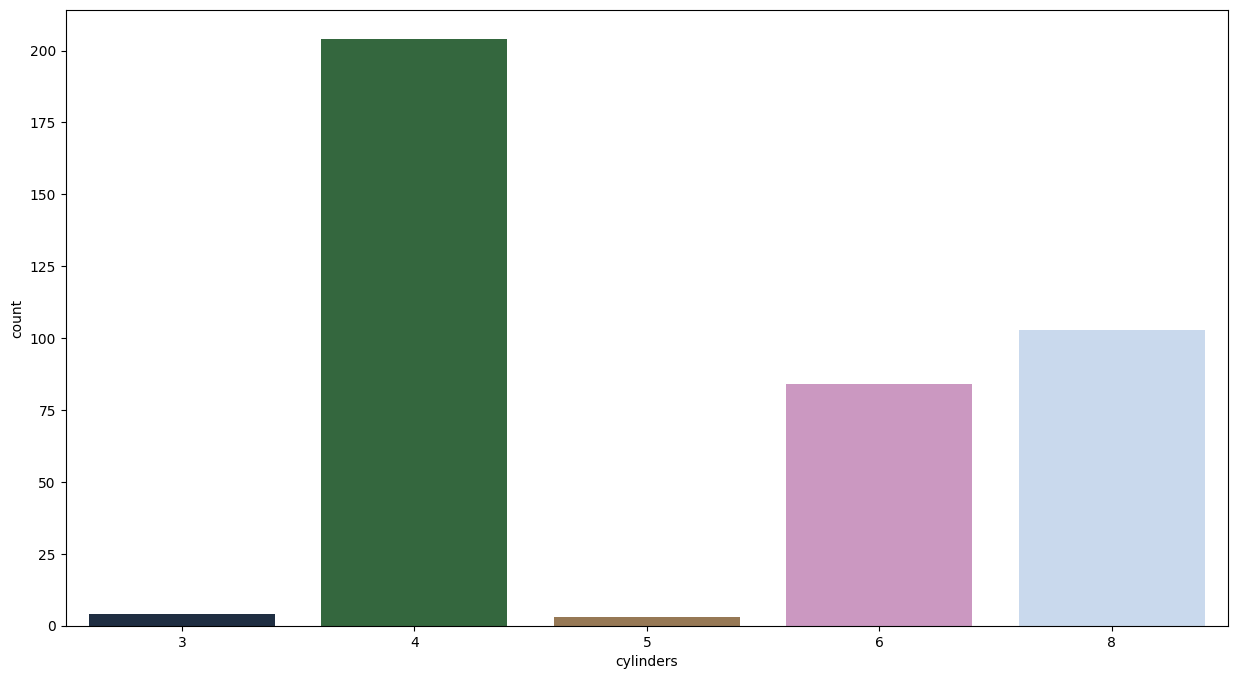

In [ ]:
plt.figure(figsize =(15,8))
sns.countplot(x=df['cylinders'], data=df,palette ='cubehelix')
plt.show()

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [ ]:
df.rename(columns={'model year': 'model_year'}, inplace=True)

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [ ]:
df['model_year'] = (1900 + df.model_year)

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130,3504,12.0,1970,1
1,15.0,8,350.0,165,3693,11.5,1970,1
2,18.0,8,318.0,150,3436,11.0,1970,1
3,16.0,8,304.0,150,3433,12.0,1970,1
4,17.0,8,302.0,140,3449,10.5,1970,1


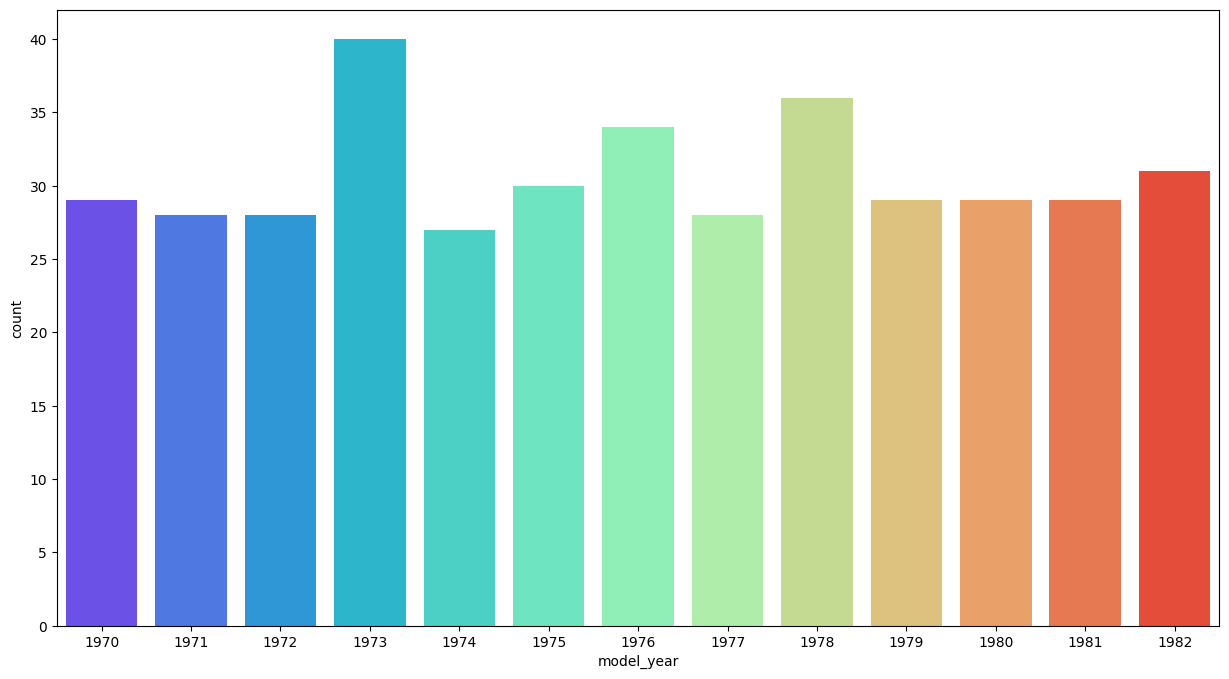

In [ ]:
plt.figure(figsize =(15,8))
sns.countplot(x=df['model_year'], data=df,palette ='rainbow')
plt.show()

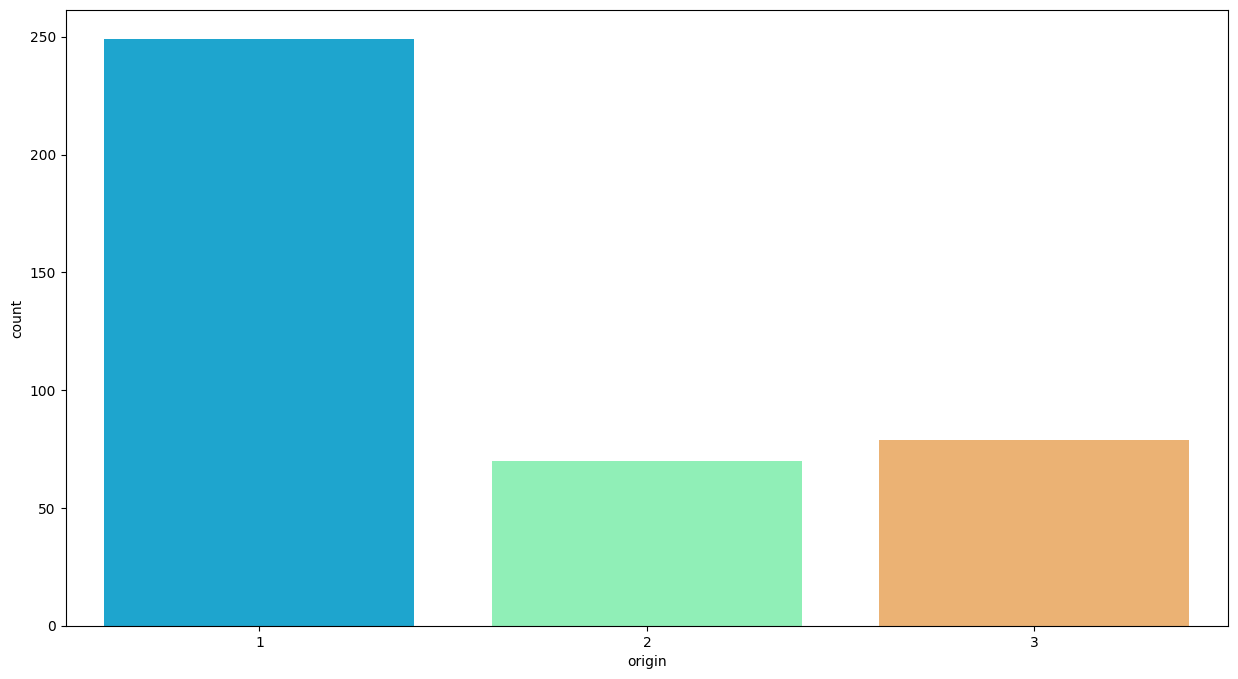

In [ ]:
plt.figure(figsize =(15,8))
sns.countplot(x=df['origin'], data=df,palette ='rainbow')
plt.show()

In [ ]:
df['origin'] = df['origin'].replace(1,'USA')
df['origin'] = df['origin'].replace(2,'Japan')
df['origin'] = df['origin'].replace(3,'Europe')

In [ ]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

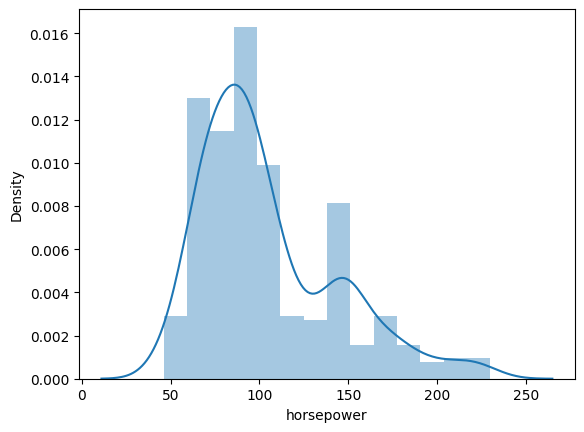

In [ ]:
sns.distplot(df['horsepower'])
plt.show()

## There is a left skew.Most vehicles have 70-100 horse power

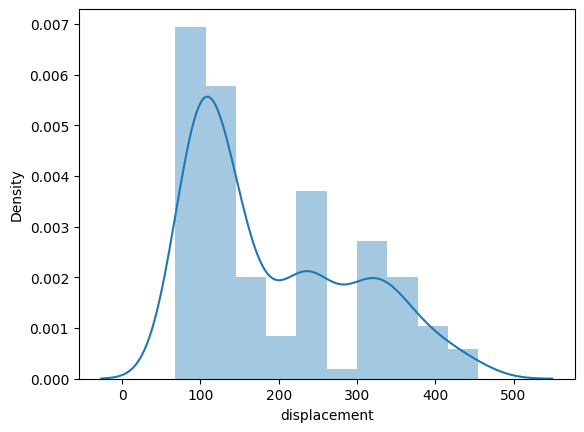

In [ ]:
sns.distplot(df['displacement'])
plt.show()

## **Bivariate Analysis**

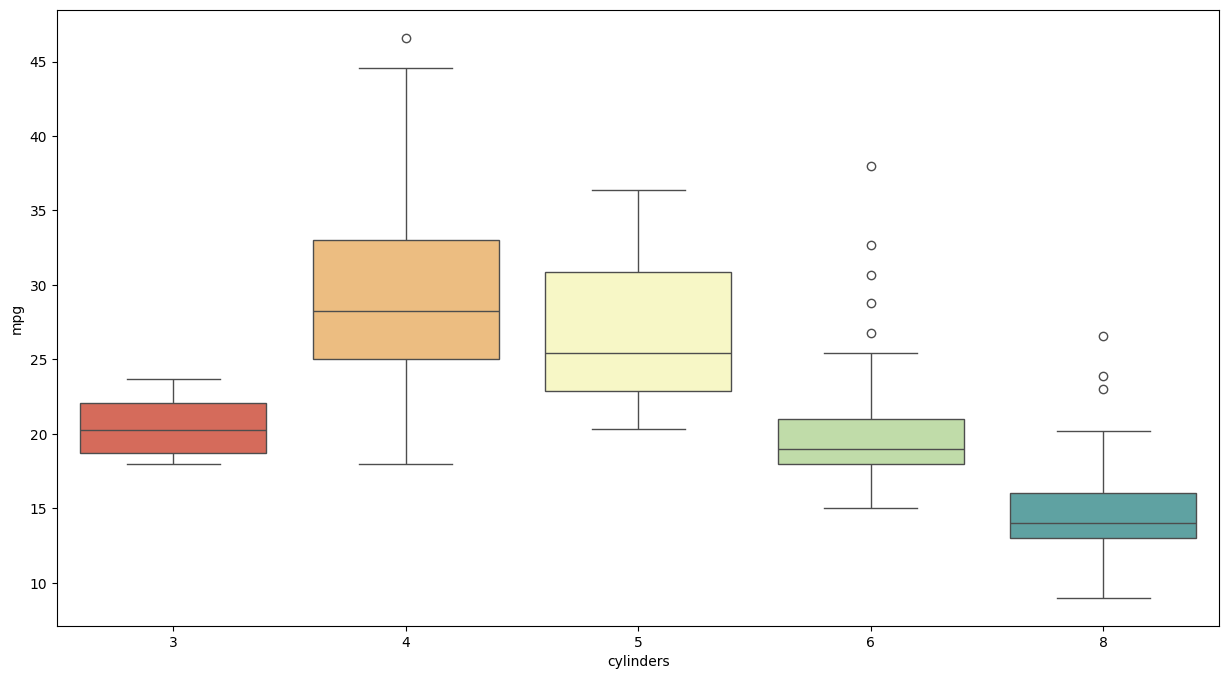

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='cylinders',y='mpg',data=df,palette='Spectral')
plt.show()

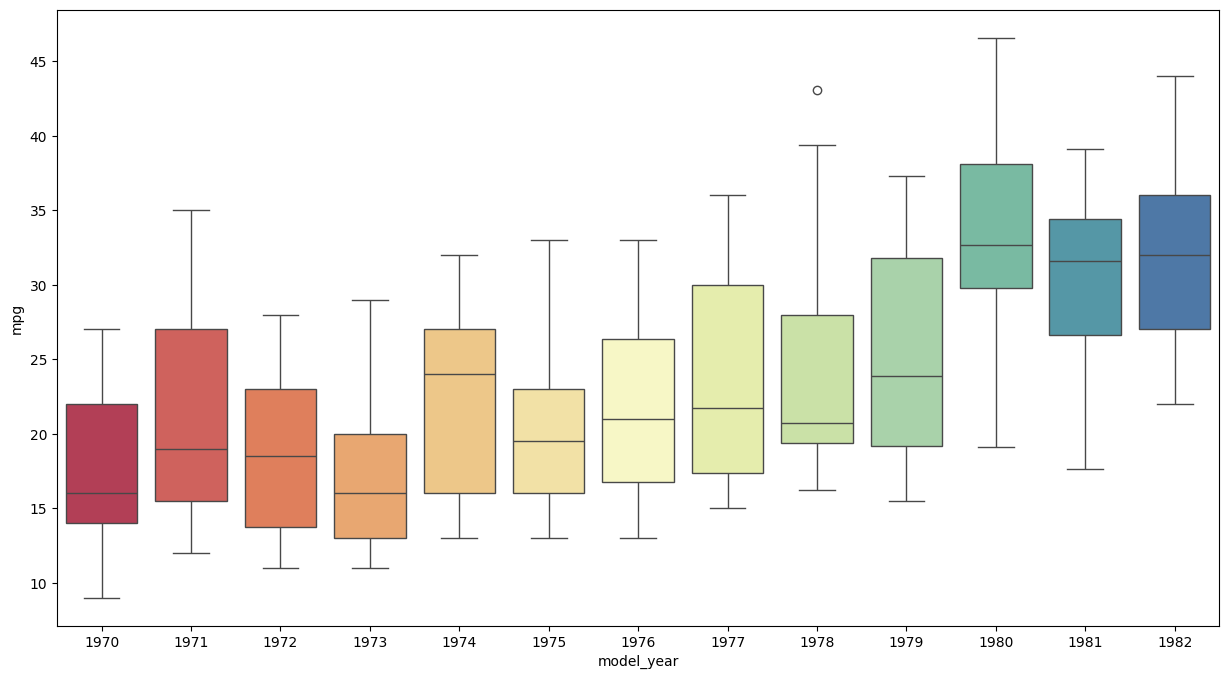

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='model_year',y='mpg',data=df,palette='Spectral')
plt.show()

As the years increase the mpg values also increase with newer models

**Multivariate Analysis**

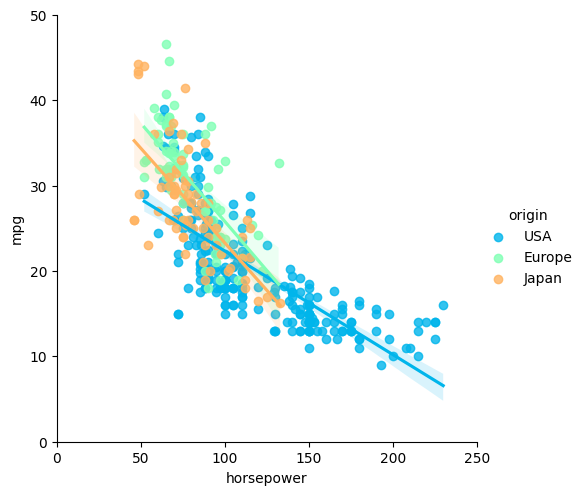

In [ ]:
graph =sns.lmplot(x='horsepower', y='mpg', hue='origin',data=df, palette='rainbow')
# We want to set the range of the graph
graph.set(xlim=(0,250))
graph.set(ylim=(0,50))
plt.show()

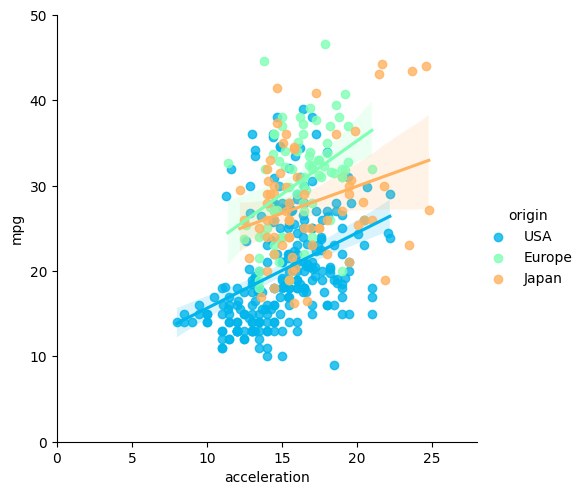

In [ ]:
graph =sns.lmplot(x='acceleration', y='mpg', hue='origin',data=df, palette='rainbow')
# We want to set the range of the graph
graph.set(xlim=(0,28))
graph.set(ylim=(0,50))
plt.show()

as the acceleration increases so as the mpg value increases

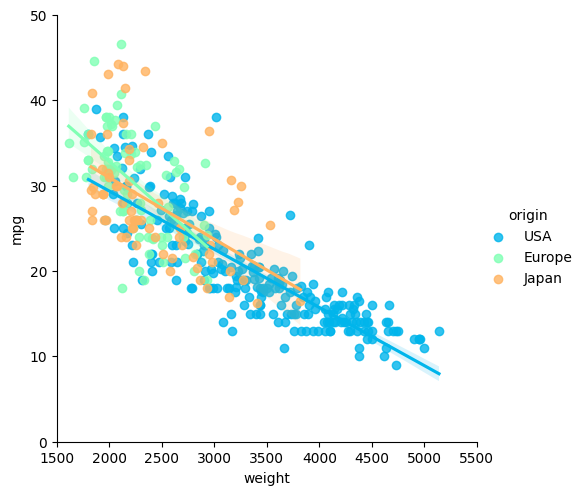

In [ ]:
graph =sns.lmplot(x='weight', y='mpg', hue='origin',data=df, palette='rainbow')

graph.set(xlim=(1500,5500))
graph.set(ylim=(0,50))
plt.show()

as the weight increases the mpg value decreases

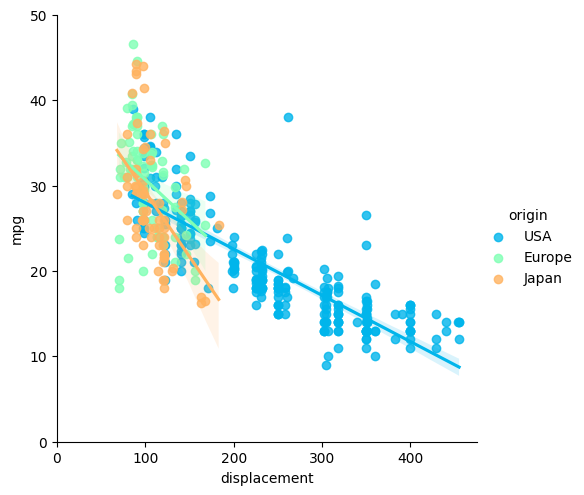

In [ ]:
graph =sns.lmplot(x='displacement', y='mpg', hue='origin',data=df, palette='rainbow')

graph.set(xlim=(0,475))
graph.set(ylim=(0,50))
plt.show()

The mpg value decreases when the engine volume decreases

In [ ]:
df['origin']= df['origin'].replace('USA',1)
df['origin'] = df['origin'].replace('Japan',2)
df['origin'] = df['origin'].replace('Europe',3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


**Heatmap of Coorelation Matrix**

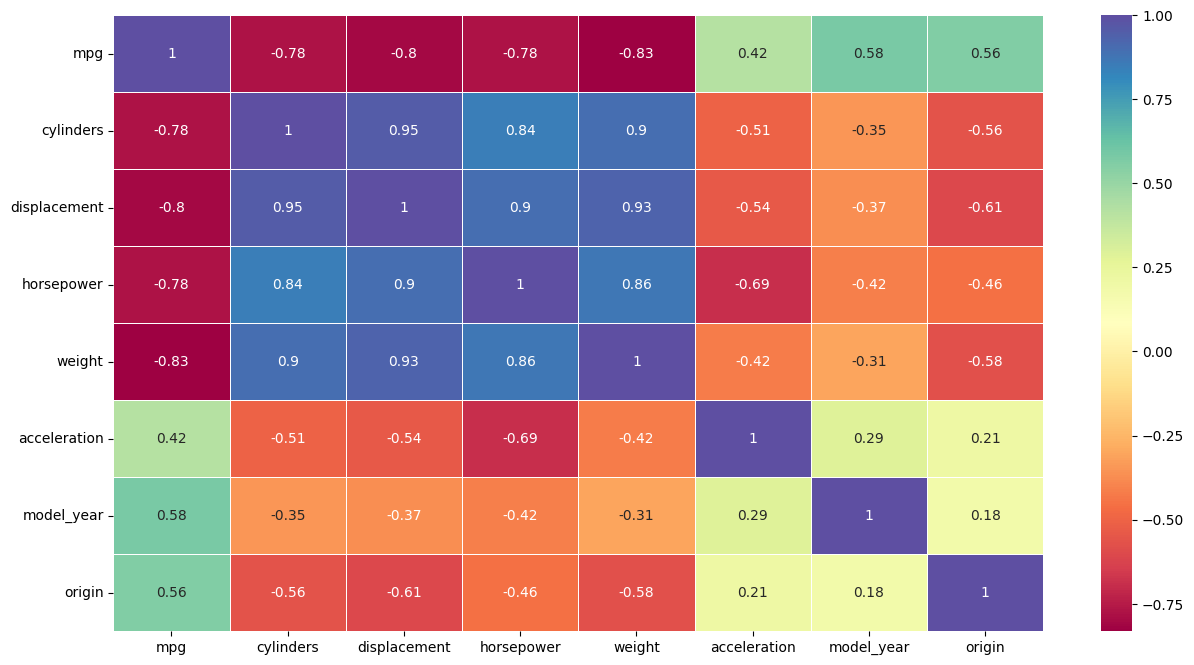

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,cmap='Spectral')
plt.show()

**In the heat map we find the variable that is coorelated wih the most amount of other variables other than mpg.We do this in order to preent overfitting.Our goal is to make the mpg prediction with the least amount of variables.These variables are displacement and acceleration it has a coorelation of 0.9 with three variables.We are trying to make the values in the dataset suitable for modelling**

In [ ]:
df.drop(['acceleration','displacement'],axis=1,inplace=True)

In [ ]:
from datetime import datetime

In [ ]:
today = datetime.today()

In [ ]:
today

datetime.datetime(2025, 7, 14, 7, 53, 28, 879696)

In [ ]:
this_year = today.year

In [ ]:
df['age'] = this_year - df.model_year

In [ ]:
df.drop(['model_year'],axis=1,inplace=True)

In [ ]:
df['origin'] = df['origin'].replace(1,'USA')
df['origin'] = df['origin'].replace(2,'Japan')
df['origin'] = df['origin'].replace(3,'Europe')

In [ ]:
df.origin.unique()

array(['USA', 'Europe', 'Japan'], dtype=object)

In [ ]:
df = pd.get_dummies(df,drop_first=True)

In [ ]:
df.head()

,mpg,cylinders,horsepower,weight,age,origin_Japan,origin_USA
0,18.0,8,130.0,3504,55,False,True
1,15.0,8,165.0,3693,55,False,True
2,18.0,8,150.0,3436,55,False,True
3,16.0,8,150.0,3433,55,False,True
4,17.0,8,140.0,3449,55,False,True


In [ ]:
df['origin_Japan'] = df['origin_Japan'].astype(int)
df['origin_USA'] = df['origin_USA'].astype(int)

In [ ]:
df.head()

,mpg,cylinders,horsepower,weight,age,origin_Japan,origin_USA
0,18.0,8,130.0,3504,55,0,1
1,15.0,8,165.0,3693,55,0,1
2,18.0,8,150.0,3436,55,0,1
3,16.0,8,150.0,3433,55,0,1
4,17.0,8,140.0,3449,55,0,1


**Modelling**

In [ ]:
X = df.drop(['mpg'],axis=1)
y = df['mpg']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train

,cylinders,horsepower,weight,age,origin_Japan,origin_USA
3,8,150.0,3433,55,0,1
18,4,88.0,2130,55,0,0
376,4,68.0,2025,43,0,0
248,4,60.0,1800,47,0,0
177,4,95.0,2694,50,1,0
...,...,...,...,...,...,...
71,3,97.0,2330,53,0,0
106,8,180.0,4499,52,0,1
270,4,95.0,2515,47,0,0
348,4,62.0,2050,44,0,0


In [ ]:
y_train

,mpg
3,16.0
18,27.0
376,37.0
248,36.1
177,23.0
...,...
71,19.0
106,12.0
270,21.1
348,37.7


In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
lm_model = LinearRegression()

In [ ]:
print(X_train.isnull().sum())
print(y_train.isnull().sum())

cylinders       0
horsepower      5
weight          0
age             0
origin_Japan    0
origin_USA      0
dtype: int64
0


In [ ]:
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # align y with dropped rows

In [ ]:
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]  # align y with dropped rows

In [ ]:
lm_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
lm_model.intercept_

np.float64(81.73321768649325)

In [ ]:
coef_param = pd.DataFrame(lm_model.coef_,index=X.columns,columns =['coeficients'])
coef_param

,coeficients
cylinders,0.304102
horsepower,-0.011412
weight,-0.006019
age,-0.805557
origin_Japan,0.049212
origin_USA,-2.203481


In [ ]:
#Makes a prediction
y_pred = lm_model.predict(X_test)

In [ ]:
my_dict = {"Actual":y_test, "Pred": y_pred}
compare = pd.DataFrame(my_dict)

In [ ]:
compare.sample(10)

,Actual,Pred
380,36.0,34.304474
33,19.0,20.857923
78,21.0,21.379620
124,11.0,15.964272
285,17.0,20.308792
141,29.0,27.611147
168,23.0,23.635851
94,13.0,9.118046
104,12.0,8.636499
22,25.0,23.312946


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
def evaluation_metric(actual,pred):
    MAE = mean_absolute_error(actual,pred)
    MSE = mean_squared_error(actual,pred)
    RMSE = np.sqrt(mean_squared_error(actual,pred))
    SCORE = r2_score(actual,pred)

    return print ("r2_score:", SCORE, "\n", "mae:",MAE, "\n" ,"mse:",MSE, "\n" ,"rmse:",RMSE)

In [ ]:
evaluation_metric(y_test,y_pred)

r2_score: 0.8353363175025044 
 mae: 2.336050954803268 
 mse: 8.955759813619242 
 rmse: 2.9926175521805725


In [ ]:
# !pip install yellowbrick

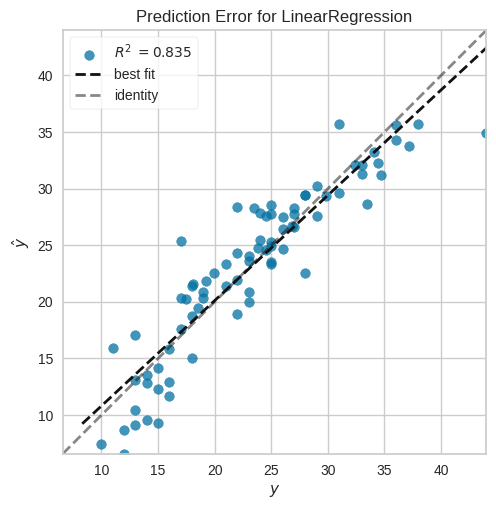

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(lm_model)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)

visualizer.show()

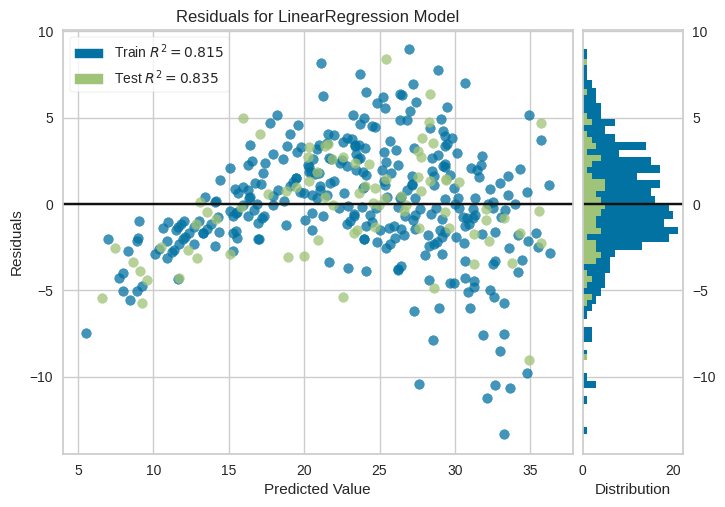

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(lm_model)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)

visualizer.show()